In [1]:
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis import transformations
from MDAnalysis.analysis import rdf

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# read in energy file using numpy 
data_water = np.loadtxt('Runs/Water/WATER_AIMD_1ns-1.ener')
data_prot = np.loadtxt('Runs/Proton/PROTON-1.ener')


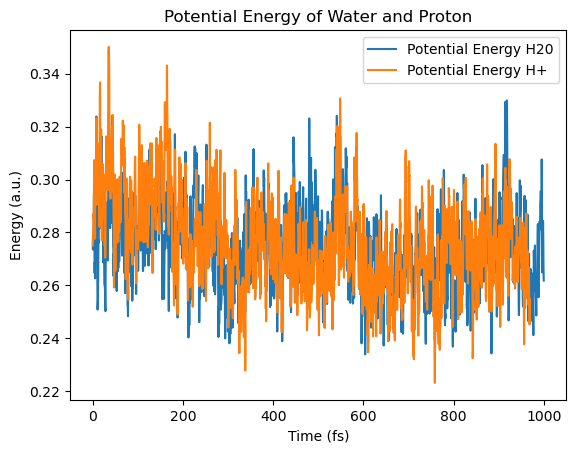

In [4]:
#plot the first column vs the second of data
plt.plot(data_water[:,1], data_water[:,2], label='Potential Energy H20')
plt.plot(data_prot[:,1], data_prot[:,2], label='Potential Energy H+')

plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Potential Energy of Water and Proton')
plt.legend()
plt.savefig('EnergyvsTime.png', dpi=300)

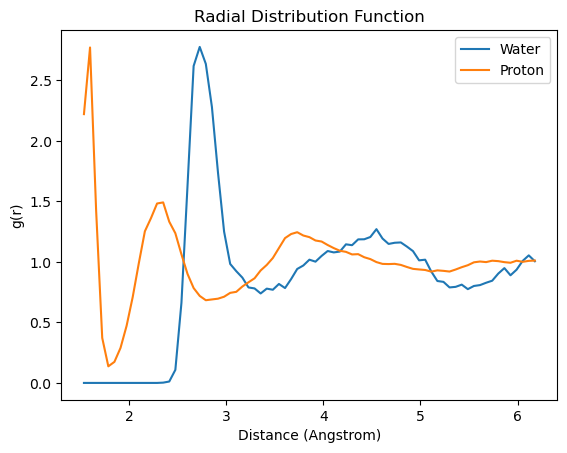

In [12]:
u_water = mda.Universe("Inputs/water.xyz", "Runs/Water/WATER_AIMD_1ns-pos-1.xyz", topology_format = "XYZ")
u_proton = mda.Universe('Runs/Proton/proton.xyz', "Runs/Proton/PROTON-pos-1.xyz", topology_format = "XYZ")

# use mda.transformations to get the box vectors
box_size = transformations.boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90])
u_water.trajectory.add_transformations(box_size)
u_proton.trajectory.add_transformations(box_size)

# get rdf
rdf_w = rdf.InterRDF(u_water.select_atoms("name O"), u_water.select_atoms("name O"), bins = 100, range = (1.5, 6.21))
rdf_w.run()
rdf_p = rdf.InterRDF(u_proton.select_atoms("name H"), u_proton.select_atoms("name H"), bins = 100, range = (1.5, 6.21))
rdf_p.run()

plt.plot(rdf_w.results.bins, rdf_w.results.rdf)
plt.plot(rdf_p.results.bins, rdf_p.results.rdf)

# make the plot look nice
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.legend(['Water', 'Proton'])
plt.savefig('RDF.png', dpi=300)

